In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#for linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#for Dicision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score

#for randomForest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#for SVR
from sklearn.svm import SVR

#for Polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
from google.colab import drive
drive.mount('/drive')
df=pd.read_csv('/drive/My Drive/project/ML_PROJECT/Concrete_Data_Yeh.csv')
df

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
df= pd.read_csv(r"C:\pythone\Masai\Concrete_Data_Yeh.csv")

In [ ]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## size

In [ ]:
df.shape

(1030, 9)

### Data look like

In [ ]:
df.sample(5)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
262,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,56,44.40
659,108.3,162.4,0.0,203.5,0.0,938.2,849.0,90,29.23
413,173.8,93.4,159.9,172.3,9.7,1007.2,746.6,3,15.82
962,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28,13.20
218,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,100,40.39


## missing values

In [ ]:
df.isna().sum() #there are no any missing value 

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

## data type

In [ ]:
df.dtypes #so here you can see there are float and int data type only and no one column datatype has Categorical

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

### look data Mathematically

#### Here we can see minimum Concrete compressive strength is 2.33 and maximum Concrete compressive strength is 82.6

In [ ]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Check Duplicate Values

#### Look, there are 25 Duplicate Value so we have to remove these 

In [ ]:
df.duplicated().sum()

25

## remove all Duplicate value  

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

### Check correlation with Concreate Compressive Strength

In [ ]:
df.corr()['csMPa'] #so here you can see Compression Strength are correlated with all the column so here every column are very importaant.

cement              0.488283
slag                0.103374
flyash             -0.080648
water              -0.269624
superplasticizer    0.344209
coarseaggregate    -0.144717
fineaggregate      -0.186448
age                 0.337367
csMPa               1.000000
Name: csMPa, dtype: float64

## Univariate Analysis 

(array([ 45., 133., 155., 179., 193., 110.,  98.,  46.,  33.,  13.]),
 array([ 2.33 , 10.357, 18.384, 26.411, 34.438, 42.465, 50.492, 58.519,
        66.546, 74.573, 82.6  ]),
 <BarContainer object of 10 artists>)

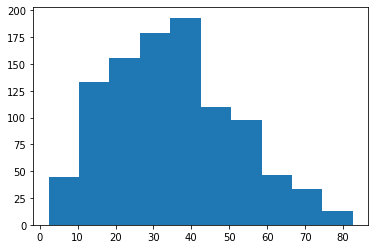

In [ ]:
plt.hist(df['csMPa']) #by this analysis you can understand the maximum sample values of Compressive strength is near by 40

(array([734.,  86., 123.,   3.,  26.,   0.,   0.,  13.,   0.,  20.]),
 array([  1. ,  37.4,  73.8, 110.2, 146.6, 183. , 219.4, 255.8, 292.2,
        328.6, 365. ]),
 <BarContainer object of 10 artists>)

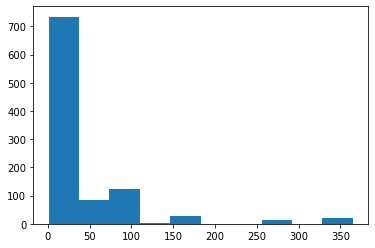

In [ ]:
plt.hist(df['age'])

## Bivariate analysis

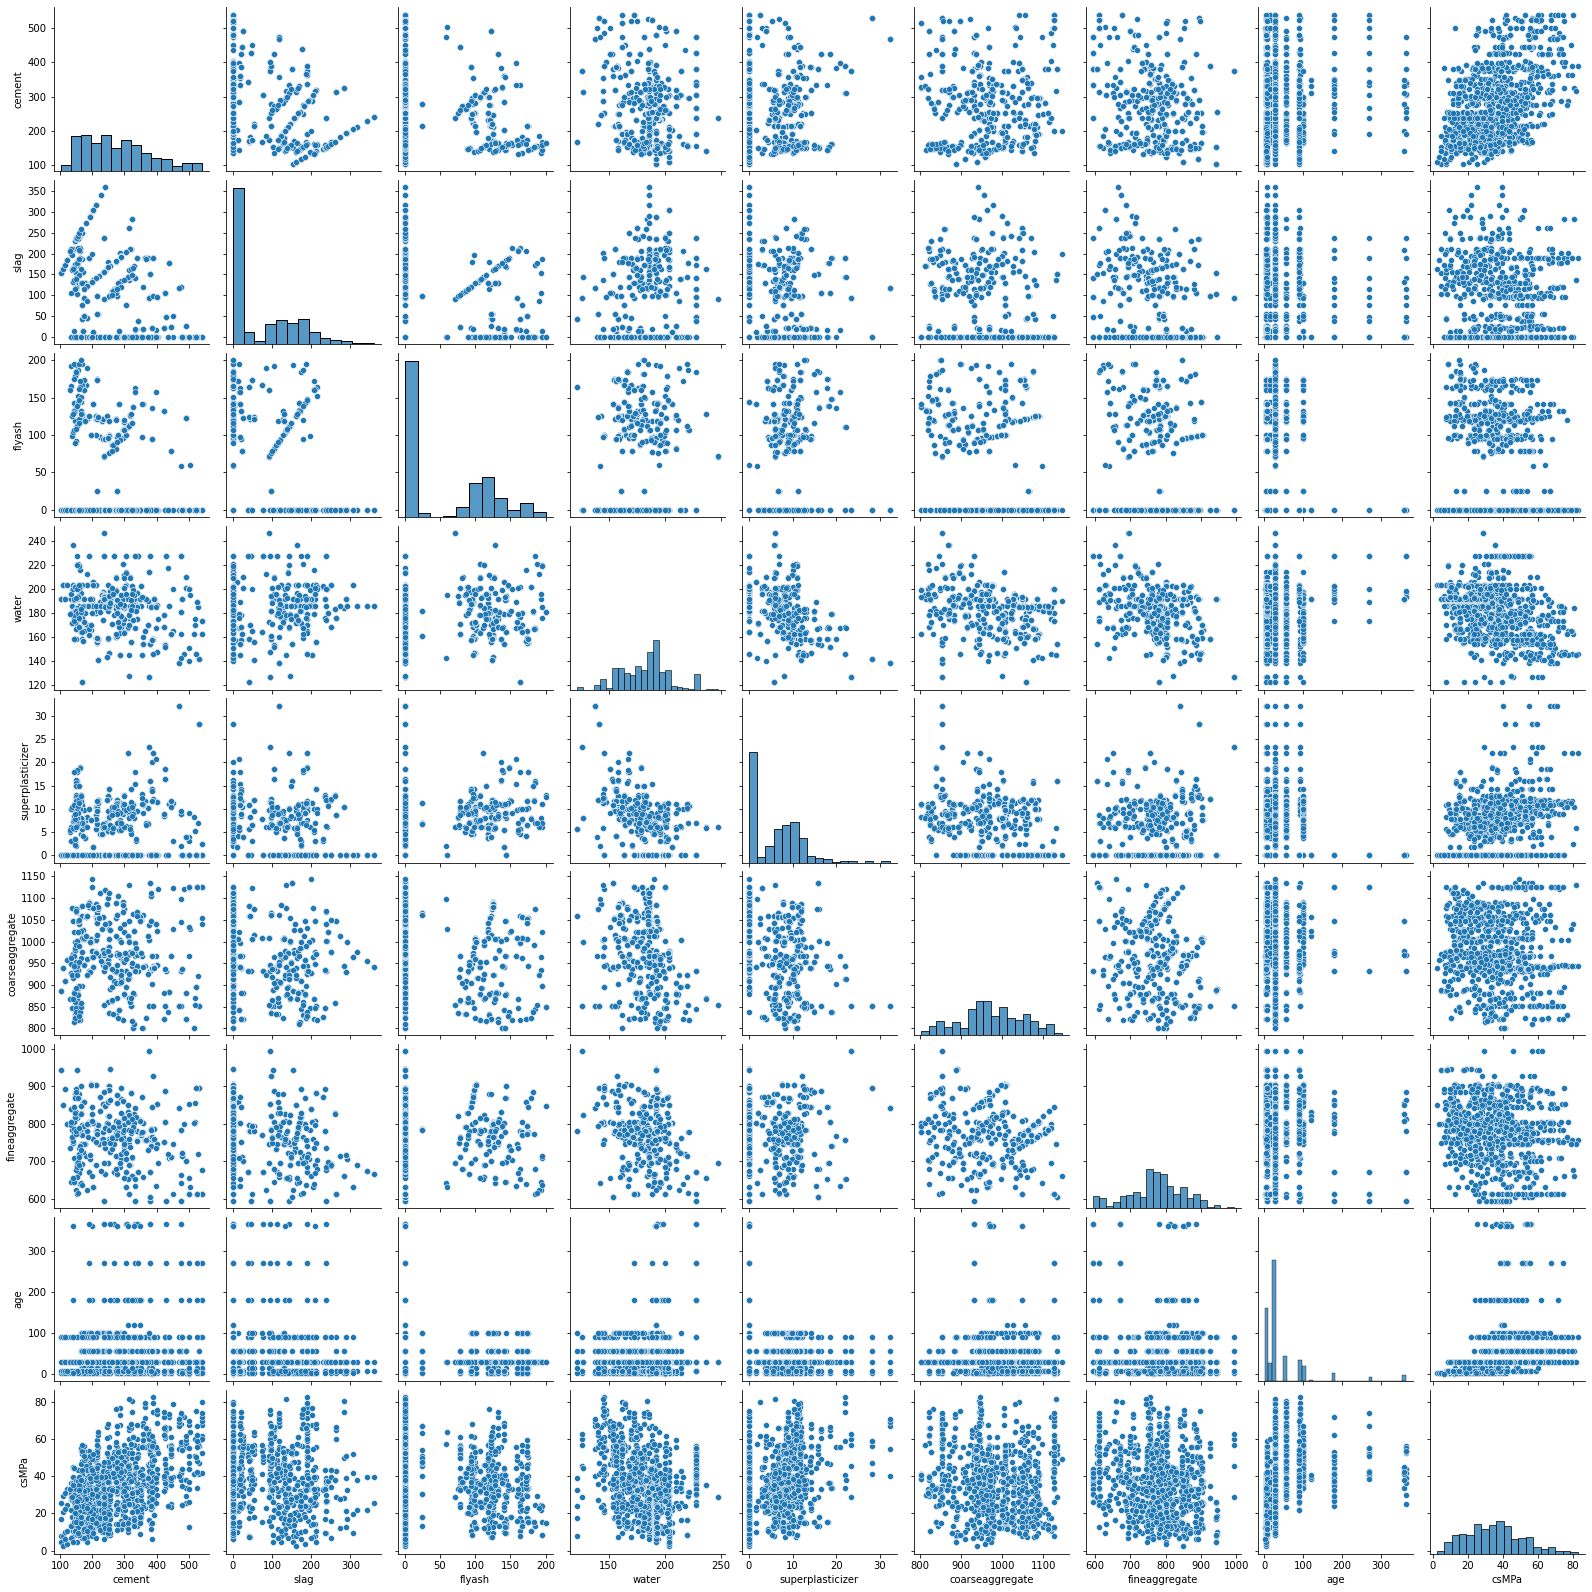

In [ ]:
sns.pairplot(df) #so here you can see relation between columns .
#1st all the columns are not related to each other 
#2nd how columns are correlated with output column cmpa 

In [ ]:
df.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
flyash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseaggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineaggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
csMPa,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


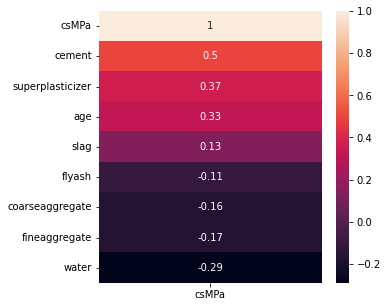

In [17]:
plt.figure(figsize=(5,5))
corr = df.corr()[['csMPa']].sort_values(by='csMPa', ascending=False)
sns.heatmap(corr, annot=True)

<AxesSubplot:>

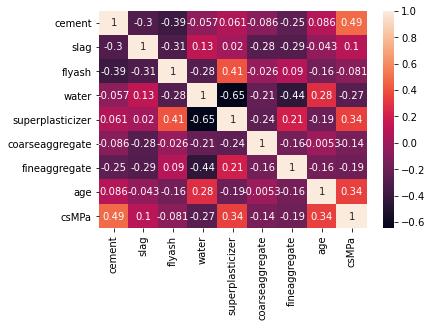

In [ ]:
# sns.heatmap(df.corr(), annot=True) #cement is + highly correlated with output columns

#### there is not any categorical column so i can't use one hot coding 

# **Outlier analysis**

### Split the data into test and train set

In [ ]:
x= df.drop(['csMPa'], axis=1).values
x

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [ ]:
y=df['csMPa'].values
y

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

In [ ]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.20, random_state=21)

In [ ]:
xtrain.shape

(804, 8)

In [ ]:
xtest.shape

(201, 8)

In [ ]:
ytrain.shape

(804,)

## Scaling 

In [ ]:
sc= StandardScaler() #StandradScaler change the value with Z-score 
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc = sc.transform(xtest)

In [ ]:
xtrain_sc

array([[ 2.4053552 , -0.83238163, -0.87159062, ...,  1.9831681 ,
        -1.96097764,  3.5269787 ],
       [ 1.06331812, -0.60277802,  0.60813866, ..., -0.4630399 ,
         0.89285563, -0.59977374],
       [ 1.63708759, -0.5568573 ,  0.37201165, ..., -0.08368144,
        -0.7431781 ,  0.16908889],
       ...,
       [-1.0956111 , -0.83238163,  1.48967951, ...,  0.64887283,
        -0.534061  , -0.27026118],
       [-0.62200816,  0.29382408, -0.4859165 , ...,  1.20875359,
         0.1597157 , -0.27026118],
       [ 0.93981181, -0.83238163, -0.87159062, ...,  0.52067583,
        -0.5168396 , -0.27026118]])

# Model Training ...

### Linear regression 

In [ ]:
line_mod=LinearRegression()
model= line_mod.fit(xtrain_sc, ytrain)

In [ ]:
ypred = line_mod.predict(xtest_sc) #prdiction 
ypred

array([25.27274588, 31.20250589, 25.42877488, 37.50232148, 36.87119437,
       42.30518857, 55.64156788, 29.46281441, 20.56888684, 31.95654369,
       32.8478931 , 36.59074013, 43.0803375 , 38.53162193, 25.37493605,
       40.05629488, 29.31917033, 31.41850115, 54.76751512, 50.77865986,
       33.35611268, 44.9643831 , 26.16684535, 40.07616114, 22.2364067 ,
       26.606621  , 28.46658418, 30.7682309 , 22.08929451, 50.6211377 ,
       63.03194283, 24.5977676 , 22.61654155, 39.98010918, 23.43354029,
       22.92311308, 35.08807621, 59.47100233, 50.39887447, 40.24392662,
       13.90845504, 19.61741454, 32.55632035, 60.72969117, 19.44121747,
       27.98115302, 57.73385738, 19.50500227, 11.56365501, 49.06903572,
       21.71266329, 37.33233244, 36.14644092, 26.6110173 , 49.00128294,
       45.60055363, 22.62568891, 29.73806656, 39.701944  , 34.0193184 ,
       37.90272649, 25.40340665, 27.33653494, 47.070607  , 40.06463881,
       34.46662924, 31.14912674, 22.68072549, 32.56544215, 28.72

#### Evaluate the model

In [ ]:
#mean absolute error
metrics.mean_absolute_error(ytest, ypred)

7.2963056459269415

In [ ]:
metrics.r2_score(ytest, ypred)

0.682556432357901

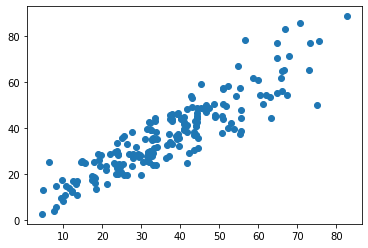

In [ ]:
plt.scatter(ytest, ypred)

In [ ]:
# plt.hist(ytest-ypred)

In [ ]:
col=df.drop(['csMPa'], axis=1)
pd.DataFrame(model.coef_,col.columns)

,0
cement,12.119400
slag,8.282122
flyash,5.822660
water,-3.460076
superplasticizer,1.321524
coarseaggregate,1.036834
fineaggregate,1.213885
age,6.988509


#### Dicision Tree 

In [ ]:
regressor= DecisionTreeRegressor()
model=regressor.fit(xtrain, ytrain)

In [ ]:
# plt.figure(figsize=(50,50))
# tree.plot_tree(regressor, feature_names=df.drop(['csMPa'], axis=1).columns)
# plt.show()

##### prediction

In [ ]:
ypred=regressor.predict(xtest)
ypred

array([19.54      , 26.23      , 17.96      , 43.06      , 40.86      ,
       54.32      , 55.5       , 24.        , 28.94      , 26.74      ,
       41.16      , 48.15      , 63.53      , 52.2       , 34.24      ,
       52.2       , 24.99      , 32.72      , 56.4       , 49.9       ,
       36.94      , 56.85      , 32.25      , 41.94      , 26.74      ,
       23.7       , 34.68      , 11.47      , 14.4       , 59.49      ,
       69.3       , 26.06      , 25.18      , 23.85      , 36.44      ,
       36.59      , 30.08      , 63.4       , 39.4       , 54.32      ,
       81.75      , 36.59      , 37.81      , 54.9       , 13.2       ,
       23.22      , 59.8       , 10.79      ,  8.37      , 34.4       ,
        7.75      , 43.58      , 42.13      , 31.03      , 54.32      ,
       33.56      , 23.74      , 23.22      , 40.93      , 37.92      ,
       41.05      , 34.24      , 13.46      , 54.32      , 23.85      ,
       23.7       , 19.42      , 16.26      , 48.15      , 43.5 

#### Evalution 

In [ ]:
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r_score= r2_score(ytest, ypred)
print("Mean_squared_erro--", mse)
print("R Mean_squared_error--", rmse)
print('R_score Value--', r_score)

Mean_squared_erro-- 63.17801046158099
R Mean_squared_error-- 7.948459628228666
R_score Value-- 0.7623696380502554


## Random Forest 

#### Hyperparameter Tuning by Random Search Cv

In [ ]:
no_of_Decision_tree=[10, 20, 30, 50]
max_no_of_feature=['sqrt', 'log2']
max_depth=[10,11,12,13,14,15]
criterian=['mse', 'mae']
min_sample_split=[1,2,3,4,5]

In [ ]:
random_grid={
    'n_estimators':no_of_Decision_tree,
    'max_features':max_no_of_feature,
    'max_depth':max_depth,
    'criterion':criterian,
    'min_samples_split':min_sample_split
    
}

In [ ]:
#called Random forest Regression 
rf=RandomForestRegressor()

In [ ]:
#for finding best hyperparameter list (random search cv)
rscv=RandomizedSearchCV(estimator=rf, param_distributions=random_grid)
rscv=rscv.fit(xtrain, ytrain)

C:\Users\prem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\prem\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\prem\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\prem\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

In [ ]:
rscv.best_params_ #so here, it is a best hyperparameter list and we would be use this one in our model

{'n_estimators': 50,
 'min_samples_split': 4,
 'max_features': 'log2',
 'max_depth': 12,
 'criterion': 'mae'}

In [ ]:
rf_regressor=RandomForestRegressor(n_estimators=50, min_samples_split=4, max_features='log2', max_depth=12, criterion='mae')
model=rf_regressor.fit(xtrain, ytrain)


In [ ]:
#prediction 
ypred= rf_regressor.predict(xtest)
ypred

array([47.1059, 27.7119, 26.7288, 20.4375, 57.5261, 34.4194, 51.2672,
       63.5491, 58.605 , 42.0076, 64.0828, 34.7197, 25.4558, 19.735 ,
       11.158 , 43.4636, 20.5853, 19.8546, 28.5348, 32.7236, 32.5619,
       15.8609, 51.5967, 37.8336, 30.6488, 13.0484, 26.5828, 68.174 ,
       27.1987, 22.1099, 28.1498, 40.8768, 15.8754, 33.2055, 46.9936,
       36.5194, 59.236 , 30.4219, 45.4911, 31.243 , 33.4697, 11.2952,
       16.8773, 29.2886, 33.5973, 34.3248, 37.8036, 35.2074, 35.4699,
       36.1452, 58.3551, 32.9083, 32.9658, 15.088 , 33.5496, 70.0451,
       17.5244, 19.0686, 52.1356, 38.1566, 32.3622,  8.9592, 41.8422,
       44.8129, 60.4849, 61.2653,  9.9219, 16.3546, 51.8985, 43.4091,
       23.3087, 17.8451, 60.3029, 38.4327, 13.4662, 38.3024, 31.0018,
       38.4666, 40.9949, 54.2149, 23.043 , 15.1516, 15.0192, 40.8502,
       58.0402, 38.3367, 17.4778, 11.7513, 18.2073, 27.9508, 17.9565,
       25.4065, 62.0253, 16.3484, 47.4536, 40.2941, 71.249 , 30.4112,
       63.3071, 33.7

In [ ]:
#Evaluate the model 
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r_score= r2_score(ytest, ypred)
print("Mean_squared_erro--", mse)
print("R Mean_squared_error--", rmse)
print('R_score Value--', r_score)

Mean_squared_erro-- 36.30839322681594
R Mean_squared_error-- 6.025644631640331
R_score Value-- 0.8948506010156336


#### Random forest model by Grid search cv

In [ ]:
#called Random forest Regression 
rf=RandomForestRegressor()

In [ ]:
#for finding best hyperparameter list (random search cv)
rscv=GridSearchCV(estimator=rf, param_grid=random_grid)
rscv=rscv.fit(xtrain, ytrain)

C:\Users\prem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prem\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\prem\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\prem\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\prem\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

In [ ]:
rscv.best_params_

{'criterion': 'mse',
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
#model training
rf_final=RandomForestRegressor(criterion= 'mse',max_depth= 15,max_features= 'log2',n_estimators= 50,min_samples_split= 2)
model = rf_final.fit(xtrain, ytrain)

In [ ]:
#prediction
ypred=rf_final.predict(xtest)

In [ ]:
#Evaluate the model 
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r_score= r2_score(ytest, ypred)
print("Mean_squared_erro--", mse)
print("R Mean_squared_error--", rmse)
print('R_score Value--', r_score)

Mean_squared_erro-- 34.140110102018184
R Mean_squared_error-- 5.84295388498131
R_score Value-- 0.901129966394767


### SVR

In [ ]:
reg=SVR()
model=reg.fit(xtrain, ytrain)

In [ ]:
#prediction
ypred= reg.predict(xtest)
ypred

array([31.92449594, 30.36410976, 31.49725216, 30.99561676, 36.61058697,
       36.24418189, 41.09531373, 40.12267973, 38.48370193, 34.06050214,
       41.12526572, 32.78046426, 29.72797475, 30.48202875, 30.90921906,
       31.58923679, 31.02940009, 30.48585253, 30.20288172, 37.78167712,
       31.20392147, 32.14331055, 35.24118227, 31.65008499, 30.73447473,
       31.72591142, 30.75091469, 41.31644782, 32.86931778, 35.8459252 ,
       39.11489456, 36.67724457, 30.99413959, 37.36789763, 34.47795358,
       31.52395676, 41.73233021, 32.56376731, 34.09992163, 32.04796487,
       32.16469479, 29.94497534, 29.8810215 , 30.0672255 , 34.49507516,
       31.25313518, 31.48167387, 33.08421234, 31.80154011, 32.09209761,
       37.44200505, 34.24346317, 31.04907523, 29.79640376, 40.65692609,
       38.65061231, 33.47401756, 33.65246901, 32.07482733, 36.37360758,
       33.56475112, 29.74206622, 34.350202  , 40.74608355, 38.86793358,
       41.36890932, 29.6467474 , 33.60699444, 40.44339974, 31.47

In [ ]:
#Evaluate
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r_score= r2_score(ytest, ypred)
print("Mean_squared_erro--", mse)
print("R Mean_squared_error--", rmse)
print('R_score Value--', r_score)

Mean_squared_erro-- 259.5622693008302
R Mean_squared_error-- 16.110936326012535
R_score Value-- 0.24830557922229546


### Polynomial Linear regression 

In [ ]:
#Call polynomial featres
poly = PolynomialFeatures(degree=2)
xtrain_poly= poly.fit_transform(xtrain)
xtest_poly = poly.transform(xtest)

In [ ]:
#model training
lr =LinearRegression()
model = lr.fit(xtrain_poly, ytrain)

In [ ]:
#prediction
ypred= lr.predict(xtest_poly)
ypred

array([36.86937787, 19.40562744, 23.67399882, 17.67668552, 48.89434742,
       45.86616552, 47.9046831 , 79.74182902, 47.71719042, 38.01397597,
       68.31698336, 22.88257522, 23.51772232, 15.35482526, 16.4243153 ,
       49.50218284, 25.14937722, 15.42795061, 24.53485399, 49.02495553,
       29.64643112, 19.08238249, 53.54424713, 34.03863148, 32.54847484,
       17.81509364, 20.09209792, 62.32431583, 33.15117071, 28.28741891,
       34.81632867, 38.02811032, 15.53739958, 35.82272578, 46.65432076,
       32.2882291 , 58.08371706, 39.21076913, 40.95558737, 39.54667783,
       31.74088518, 13.60767518, 16.42530976, 29.19191757, 30.71269359,
       29.45640496, 33.3347515 , 43.10895137, 35.48461344, 31.64269747,
       74.5200647 , 29.41474463, 25.13036938, 17.35466966, 37.21944758,
       63.80928424, 20.86178016, 26.569535  , 44.12805247, 36.2759582 ,
       33.69487565, 13.72269676, 41.15147282, 49.88408107, 58.01763495,
       61.59840159, 12.57717482, 22.5430198 , 49.21355581, 36.77

In [ ]:
#Evaluation 
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r_score= r2_score(ytest, ypred)
print("Mean_squared_erro--", mse)
print("R Mean_squared_error--", rmse)
print('R_score Value--', r_score)

Mean_squared_erro-- 69.53605107998041
R Mean_squared_error-- 8.33882792003651
R_score Value-- 0.7986230364662343


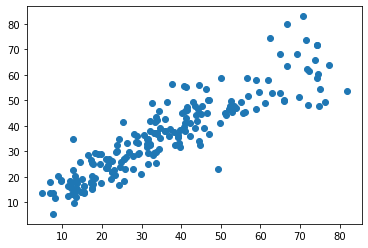

In [ ]:
plt.scatter(ytest, ypred)

In [ ]:
#model training
lr =LinearRegression()
model = lr.fit(xtrain_poly, ytrain)

In [ ]:
#prediction
ypred= lr.predict(xtest_poly)
ypred

array([36.86937787, 19.40562744, 23.67399882, 17.67668552, 48.89434742,
       45.86616552, 47.9046831 , 79.74182902, 47.71719042, 38.01397597,
       68.31698336, 22.88257522, 23.51772232, 15.35482526, 16.4243153 ,
       49.50218284, 25.14937722, 15.42795061, 24.53485399, 49.02495553,
       29.64643112, 19.08238249, 53.54424713, 34.03863148, 32.54847484,
       17.81509364, 20.09209792, 62.32431583, 33.15117071, 28.28741891,
       34.81632867, 38.02811032, 15.53739958, 35.82272578, 46.65432076,
       32.2882291 , 58.08371706, 39.21076913, 40.95558737, 39.54667783,
       31.74088518, 13.60767518, 16.42530976, 29.19191757, 30.71269359,
       29.45640496, 33.3347515 , 43.10895137, 35.48461344, 31.64269747,
       74.5200647 , 29.41474463, 25.13036938, 17.35466966, 37.21944758,
       63.80928424, 20.86178016, 26.569535  , 44.12805247, 36.2759582 ,
       33.69487565, 13.72269676, 41.15147282, 49.88408107, 58.01763495,
       61.59840159, 12.57717482, 22.5430198 , 49.21355581, 36.77

In [ ]:
#Evaluation 
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r_score= r2_score(ytest, ypred)
print("Mean_squared_erro--", mse)
print("R Mean_squared_error--", rmse)
print('R_score Value--', r_score)

Mean_squared_erro-- 69.53605107998041
R Mean_squared_error-- 8.33882792003651
R_score Value-- 0.7986230364662343
